In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN


In [48]:
# Make sure you have the Apple stock CSV file
dataframe = pd.read_csv('apple.csv')  # Your Apple stock CSV

# Convert 'Date' column to datetime and set as index
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe.set_index('Date', inplace=True)


In [49]:
# Remove $ symbols, commas, and spaces
dataframe['Close'] = dataframe['Close'].astype(str).str.replace('$', '').str.replace(',', '').str.strip()

# Convert to numeric and drop invalid rows
dataframe['Close'] = pd.to_numeric(dataframe['Close'], errors='coerce')
dataframe.dropna(subset=['Close'], inplace=True)

# Extract closing prices
closing_prices = dataframe[['Close']].values

# Normalize between 0 and 1
scaler_obj = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler_obj.fit_transform(closing_prices)

# Quick check
print("Normalized data shape:", normalized_data.shape)
print("First 5 values:\n", normalized_data[:5])


Normalized data shape: (2518, 1)
First 5 values:
 [[0.81894262]
 [0.81948068]
 [0.88381255]
 [0.86844419]
 [0.90240927]]


In [79]:
def generate_sequences(data, seq_len):
    X_seq, y_seq = [], []
    for idx in range(len(data) - seq_len):
        X_seq.append(data[idx:idx + seq_len])
        y_seq.append(data[idx + seq_len])
    return np.array(X_seq), np.array(y_seq)

sequence_len = 60  # Number of past days to look at
X_features, y_labels = generate_sequences(normalized_data, sequence_len)

print("Feature shape:", X_features.shape)
print("Label shape:", y_labels.shape)


Feature shape: (2458, 60, 1)
Label shape: (2458, 1)


In [80]:
train_test_split_idx = int(len(X_features) * 0.8)

X_train_data, y_train_data = X_features[:train_test_split_idx], y_labels[:train_test_split_idx]
X_test_data, y_test_data = X_features[train_test_split_idx:], y_labels[train_test_split_idx:]

print("Training set:", X_train_data.shape, y_train_data.shape)
print("Test set:", X_test_data.shape, y_test_data.shape)


Training set: (1966, 60, 1) (1966, 1)
Test set: (492, 60, 1) (492, 1)


In [81]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_len, 1)))
rnn_model.add(Dense(1))  # Output layer

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

rnn_model.summary()


c:\Users\huzai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
training_history = rnn_model.fit(
    X_train_data, y_train_data,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_data, y_test_data)
)


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.6553e-05 - val_loss: 2.3661e-05
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1874e-05 - val_loss: 2.3431e-05
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4666e-05 - val_loss: 3.2163e-05
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0473e-04 - val_loss: 4.9353e-05
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3730e-05 - val_loss: 2.5907e-05
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9134e-05 - val_loss: 3.7343e-05
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9578e-05 - val_loss: 3.3232e-05
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7363e-05 - val_loss: 1.6974e-05
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.5283e-05 - val_loss: 1.9340e-05
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0416e-05 - val_loss: 3.6726e-05
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3504e-0

In [84]:
future_predictions = []
recent_sequence = normalized_data[train_test_split_idx - sequence_len:train_test_split_idx]

for _ in range(75):
    recent_sequence = np.reshape(recent_sequence, (1, sequence_len, 1))
    predicted_price = rnn_model.predict(recent_sequence, verbose=0)

    future_predictions.append(predicted_price[0][0])
    predicted_price = np.reshape(predicted_price, (1, 1, 1))
    recent_sequence = np.append(recent_sequence[:, 1:, :], predicted_price, axis=1)

future_predictions = np.array(future_predictions).reshape(-1, 1)
predicted_future_prices = scaler_obj.inverse_transform(future_predictions)


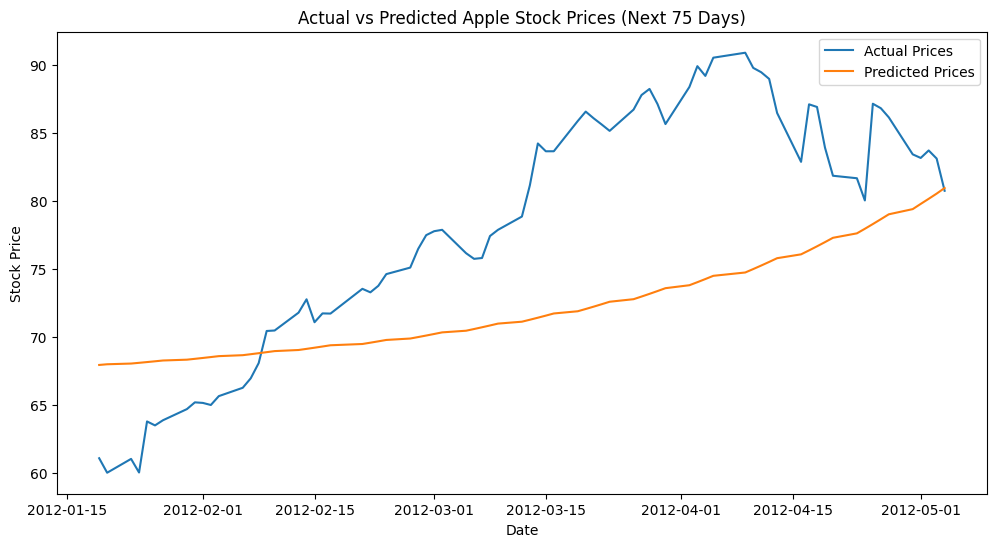

In [86]:
# Plot for 75 days instead of 20
actual_75_prices = scaler_obj.inverse_transform(normalized_data[train_test_split_idx:train_test_split_idx+75])

plt.figure(figsize=(12,6))
plt.plot(dataframe.index[train_test_split_idx:train_test_split_idx+75], actual_75_prices, label='Actual Prices')
plt.plot(dataframe.index[train_test_split_idx:train_test_split_idx+75], predicted_future_prices[:75], label='Predicted Prices')
plt.title('Actual vs Predicted Apple Stock Prices (Next 75 Days)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [88]:
for day in range(75):
    print(f"Day {day+1}: Actual: {actual_75_prices[day][0]}, Predicted: {predicted_future_prices[day][0]}")


Day 1: Actual: 80.75, Predicted: 80.95494842529297
Day 2: Actual: 83.1171, Predicted: 80.54212188720703
Day 3: Actual: 83.7114, Predicted: 80.15967559814453
Day 4: Actual: 83.1614, Predicted: 79.78545379638672
Day 5: Actual: 83.4257, Predicted: 79.40357971191406
Day 6: Actual: 86.1428, Predicted: 79.0225601196289
Day 7: Actual: 86.8143, Predicted: 78.6612777709961
Day 8: Actual: 87.1428, Predicted: 78.30643463134766
Day 9: Actual: 80.04, Predicted: 77.95918273925781
Day 10: Actual: 81.6714, Predicted: 77.62327575683594
Day 11: Actual: 81.85430000000001, Predicted: 77.29676818847656
Day 12: Actual: 83.92, Predicted: 76.97965240478516
Day 13: Actual: 86.9057, Predicted: 76.67143249511719
Day 14: Actual: 87.1, Predicted: 76.37225341796875
Day 15: Actual: 82.8757, Predicted: 76.08161926269531
Day 16: Actual: 86.46140000000001, Predicted: 75.79927825927734
Day 17: Actual: 88.9671, Predicted: 75.52507019042969
Day 18: Actual: 89.4571, Predicted: 75.25872039794922
Day 19: Actual: 89.7771, Pre